## 데이터 전처리 과정

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('얍💢')

얍💢


In [3]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('얍💢')

얍💢


In [4]:
train.head() # 코드 앞머리 5개만 보겠다는 뜻

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [5]:
# date  칼럼 전처리 하기
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()
# 앞에서 6자리 수 만큼 잘랐다( date data)

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [6]:
y = train['price']
del train['price']
del train['id']
print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
# test data 에서도 위와 같은 전처리 과정을 진행해 준다
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

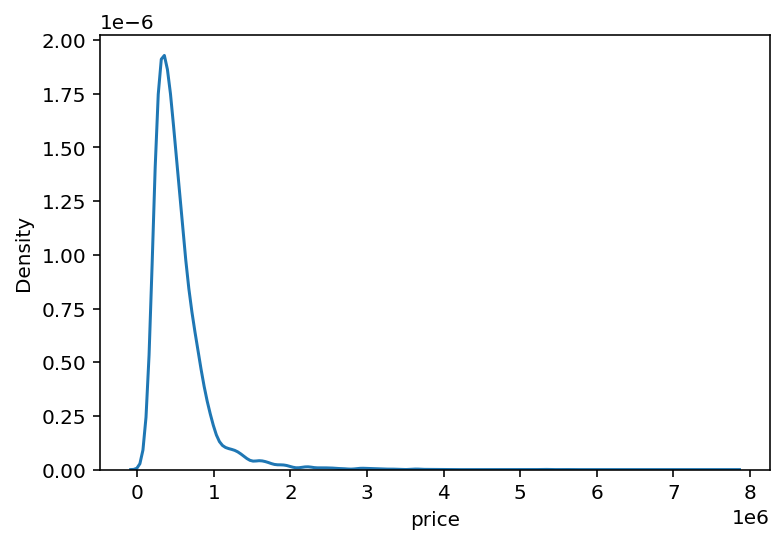

In [9]:
# 가격 데이터 분포 확인하기
sns.kdeplot(y)
plt.show()

In [10]:
# 그래프가 한쪽으로 치우쳐 있기 때문에 log  함수를 사용해서 형태를 변환해준다
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

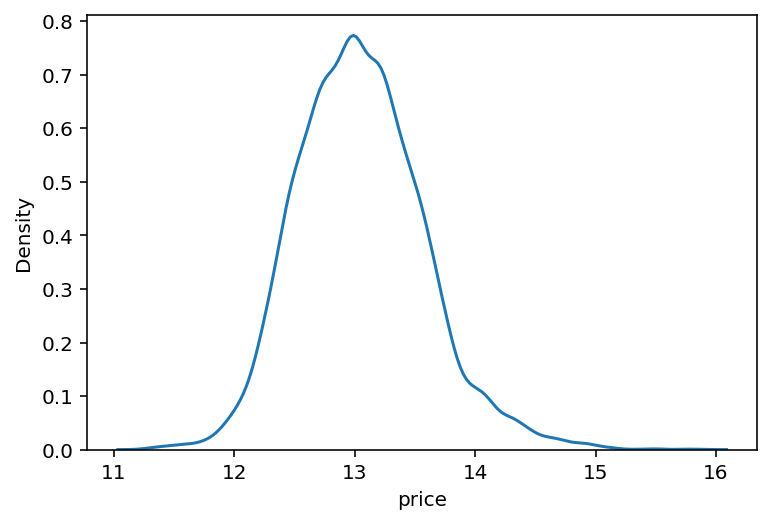

In [11]:
sns.kdeplot(y)
plt.show()

In [12]:
# info  함수로 전체 데이터의 자료형 확인하기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## 모델 튜닝하기

In [13]:
from sklearn.model_selection import train_test_split #훈련데이터와 검증데이터로 나누기 위해서
from sklearn.metrics import mean_squared_error  #평가척도를 나타내는 RMSE 점수 계산하기 위해서 가져오기


In [14]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [15]:
#  XGBRegressor, LGBMRegressor, GradientBoostingRegressor, RandomForestRegressor 네 가지 모델을 가져오기.
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [16]:
# model 인스턴스를 생선한 후 modles 라는 리스트에 넣어줍니다
random_state=2020

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [17]:
# for 문으로 학습
df ={}

for model in models:
    model_name = model.__class__.__name__
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df[model_name] = rmse(y_test,y_pred)
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

df
print('ok')

ok


In [18]:
def get_scores(models, train, y):
    df={}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df
print('ok')
    

ok


### 그리드 탐색하기

In [19]:
#sklearn.model_selection 라이브러리 안에 있는 GridSearchCV 클래스를 활용ㅇ한다
from sklearn.model_selection import GridSearchCV



그리드 탐색과 랜덤 탐색을 알아보자. 그리드 탐색, 랜덤 탐색 모두 하이퍼 파라미터를 조합하는 방법이다.
- 그리드 탐색은 사람이 먼저 탐색할 하이퍼 파라미터 값들을 정해두고, 그 값들로 만들어 질 수 있는 모든 조합을 탐색한다. 특정 값에 대한 하이퍼 파리미터 조합을 모두 탐색할때 유리하다.
- 랜덤탐색은 사람이 탐색할 하이퍼 파라미터 공간만 정해두고, 그 안에서 랜덤으로 조합을 선택해서 탐색하는 방법이다.

#### GridSearchCV 에서 입력되는 인자
- param_grid: 탐색할 파라미터 종류(딕셔너리로 입력)
- sooring: 모델의 성능을 평가할 지표
- ov: cross validation 을 수행하기 위해 train 데이터셋을 나누는 조각 개수
- verbose: 그리드 탐색을 진행하면서 진행 과정을 출력해서 보여줄 메세지의 양
- n_joba: 그리드 탐색을 진행하면서 사용할 cpu 개수

In [20]:
# 그리드 탐색에 xgboost 와 관련된 하이퍼 파리마터를 넣어서 준비하기

n_estimators = [50,350, 375]
max_depth = [3,7,10]
learning_rate=[0.01, 0.3]
num_leaves=[100,200,300,400,500,600,700,800,900,1000]


param_grid = dict( n_estimators=n_estimators, max_depth=max_depth, learning_rate= learning_rate,num_leaves=num_leaves)

In [21]:
model = LGBMRegressor(random_state=random_state)

print('ok')

ok


In [22]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.3], 'max_depth': [3, 7, 10],
                         'n_estimators': [50, 350, 375],
                         'num_leaves': [100, 200, 300, 400, 500, 600, 700, 800,
                                        900, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [23]:
grid_model.cv_results_

{'mean_fit_time': array([ 0.25761018,  0.17744613,  0.17921286,  0.19318509,  0.18774319,
         0.2120213 ,  0.20579414,  0.23493662,  0.2130712 ,  0.25803113,
         1.03706651,  1.1164505 ,  0.97036753,  0.98971033,  1.00339851,
         1.101578  ,  0.99397488,  1.01232123,  0.92023387,  1.12424331,
         1.15026851,  0.87955413,  1.28968487,  1.00009589,  1.11002889,
         1.13559842,  1.04518085,  1.08776665,  1.16895814,  1.07746363,
         0.56601443,  0.64546123,  0.60442595,  0.61920748,  0.61883888,
         0.55222673,  0.65707126,  0.58002858,  0.59019957,  0.68707852,
         3.69963965,  3.78157001,  3.1979095 ,  3.77087088,  3.38333468,
         3.52195873,  3.78398118,  4.05102401,  3.39880233,  3.58254161,
         3.80452266,  3.53723559,  3.89902024,  3.82293282,  3.99085956,
         3.6431829 ,  3.6399682 ,  3.87535753,  3.7108573 ,  4.13678498,
         0.69638605,  1.01693635,  1.45227599,  1.49384427,  1.51629753,
         1.47319946,  1.78707781, 

In [24]:
params = grid_model.cv_results_['params']
params

[{'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50,
  'num_leaves': 100},
 {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50,
  'num_leaves': 200},
 {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50,
  'num_leaves': 300},
 {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50,
  'num_leaves': 400},
 {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50,
  'num_leaves': 500},
 {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50,
  'num_leaves': 600},
 {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50,
  'num_leaves': 700},
 {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50,
  'num_leaves': 800},
 {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50,
  'num_leaves': 900},
 {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 50,
  'num_leaves': 1000},
 {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 350,
  'num_leaves': 100},
 {'learning_rate': 0.01,
  'max_depth': 3

In [25]:
score = grid_model.cv_results_['mean_test_score']
score
# 각 params 에 대한 조합이 들어있다

array([-0.15611745, -0.15611745, -0.15611745, -0.15611745, -0.15611745,
       -0.15611745, -0.15611745, -0.15611745, -0.15611745, -0.15611745,
       -0.04570856, -0.04570856, -0.04570856, -0.04570856, -0.04570856,
       -0.04570856, -0.04570856, -0.04570856, -0.04570856, -0.04570856,
       -0.04437311, -0.04437311, -0.04437311, -0.04437311, -0.04437311,
       -0.04437311, -0.04437311, -0.04437311, -0.04437311, -0.04437311,
       -0.13272586, -0.13274547, -0.13274547, -0.13274547, -0.13274547,
       -0.13274547, -0.13274547, -0.13274547, -0.13274547, -0.13274547,
       -0.03044486, -0.03045477, -0.03045477, -0.03045477, -0.03045477,
       -0.03045477, -0.03045477, -0.03045477, -0.03045477, -0.03045477,
       -0.02996413, -0.02997455, -0.02997455, -0.02997455, -0.02997455,
       -0.02997455, -0.02997455, -0.02997455, -0.02997455, -0.02997455,
       -0.13104335, -0.12857293, -0.12794882, -0.12793559, -0.12793559,
       -0.12793559, -0.12793559, -0.12793559, -0.12793559, -0.12

In [26]:
results = pd.DataFrame(params)
results['score']=score
results

learning_rate  max_depth  n_estimators  num_leaves     score
0             0.01          3            50         100 -0.156117
1             0.01          3            50         200 -0.156117
2             0.01          3            50         300 -0.156117
3             0.01          3            50         400 -0.156117
4             0.01          3            50         500 -0.156117
..             ...        ...           ...         ...       ...
175           0.30         10           375         600 -0.031481
176           0.30         10           375         700 -0.031481
177           0.30         10           375         800 -0.031481
178           0.30         10           375         900 -0.031481
179           0.30         10           375        1000 -0.031481

[180 rows x 5 columns]

In [27]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

learning_rate  max_depth  n_estimators  num_leaves     score      RMSE
0             0.01          3            50         100 -0.156117  0.395117
1             0.01          3            50         200 -0.156117  0.395117
2             0.01          3            50         300 -0.156117  0.395117
3             0.01          3            50         400 -0.156117  0.395117
4             0.01          3            50         500 -0.156117  0.395117
..             ...        ...           ...         ...       ...       ...
175           0.30         10           375         600 -0.031481  0.177429
176           0.30         10           375         700 -0.031481  0.177429
177           0.30         10           375         800 -0.031481  0.177429
178           0.30         10           375         900 -0.031481  0.177429
179           0.30         10           375        1000 -0.031481  0.177429

[180 rows x 6 columns]

In [28]:
# log --> exp
results = results.rename(columns={'RMSE': 'RMSLE'})
results

learning_rate  max_depth  n_estimators  num_leaves     score     RMSLE
0             0.01          3            50         100 -0.156117  0.395117
1             0.01          3            50         200 -0.156117  0.395117
2             0.01          3            50         300 -0.156117  0.395117
3             0.01          3            50         400 -0.156117  0.395117
4             0.01          3            50         500 -0.156117  0.395117
..             ...        ...           ...         ...       ...       ...
175           0.30         10           375         600 -0.031481  0.177429
176           0.30         10           375         700 -0.031481  0.177429
177           0.30         10           375         800 -0.031481  0.177429
178           0.30         10           375         900 -0.031481  0.177429
179           0.30         10           375        1000 -0.031481  0.177429

[180 rows x 6 columns]

In [29]:
results = results.sort_values('RMSLE')
results

learning_rate  max_depth  n_estimators  num_leaves     score     RMSLE
116           0.30          3           375         700 -0.027535  0.165936
119           0.30          3           375        1000 -0.027535  0.165936
118           0.30          3           375         900 -0.027535  0.165936
117           0.30          3           375         800 -0.027535  0.165936
110           0.30          3           375         100 -0.027535  0.165936
..             ...        ...           ...         ...       ...       ...
6             0.01          3            50         700 -0.156117  0.395117
8             0.01          3            50         900 -0.156117  0.395117
9             0.01          3            50        1000 -0.156117  0.395117
5             0.01          3            50         600 -0.156117  0.395117
0             0.01          3            50         100 -0.156117  0.395117

[180 rows x 6 columns]

## 재출 함수 만들기

In [30]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [31]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.0168.csv saved!


## 회고
- submission 스코어 : 113112.14053
- 이번 프로젝트에서 어려웠던점  
캐글이라는 것을 처음 알게 되었고 그냥 모든 부분이 생소하게 느껴져서 어려웠습니다. 특히 하이퍼파라미터 조정에서 그 파라미터가 조절될때 마다 평가 지표에 어떤 변화에 영향을 미치는지 찾아봤지만 평균 이정도 값을 사용한다 외에 정보를 찾을 수 없었습니다.
- 프로젝트를 진행하면서 알아낸점 혹은 아직 모호한점  
각각 하이퍼파라미터가 결과값에 어떤 영향을 미치는지, 어떻게 파라미터값의 범위를 조절하고 정해야 하는지 모호합니다. 찾아봤지만 제가 정확하게 알고 싶어하는 내용이 있는 정보를 찾지 못하였습니다.
- 루브릭 평가 지표를 맞추기 위해 시도한 것들  
먼저 n_estimators 의 값의 지표 구간을 정하였습니다. 1-100 까지 범위였지만 1- 400까지의 범위로 일정한 간격으로 늘렸습니다. max_depth 도 범위를 수정하여 1-10 까지 늘렸습니다. 그러고 나니 평가 지표에서 375, 10 에서 가장 지표가 좋게 나옴을 확인 할 수 있었습니다. 여기서 다른 하이퍼 파리미터도 추가하였습니다, learning_rate, num_leaves 도 추가해 보았습니다. 각각 무작위(직감)으로 파라미터 범위를 정하였고 코드를 돌렸습니다. 신기하게도 파라미터를 추가한 경우 (num_estimatros, max_depth) = (3,375) 좌표가 가장 좋은 평가를 받게 되었습니다. 
기존 2가지의 파라미터를 조절하고 2개의 파라미터를 추가하였지만 기존 결과값에서 큰 차이를 얻지 못하였습니다. 
- 만약에 루브릭 평가 관련 지표를 달성 하지 못했을때, 이유에 관한 추청 
루브릭 평가 지표를 달성하지 못하였습니다. 사실 파라미터를 찾아보고 할 수 있는 범위 내에서 파라미터를 추가하고 코드를 변경해 보았지만, 저에게는 하이퍼파라미터에 대한 지식이 부족했고 제가 필요한 정보도 찾지 못했기 때문에 더 할 수 있는 부분이 없었습니다. 그리고 하이퍼 파리미터 조정에서 평균적으로 이 정도 값을 상요한다 라는 정보는 있었지만, 그 외에 다른 숫자에서 더 좋은 결과를 보기도 하였고 평균적으로 사용되는 값의 범위, 사용되는 값은 있지만 숫자를 감으로 맞춰야 하는게 아닌가 라는 생각도 들었습니다.
- 자기다짐  
이번 아이펠을 통해서 머신러닝, 딥러닝 프로그램을 처음 접하는 사람이고 그래서 아직 모든 부분에서의 이해력이나 정보를 받아드리는 부분이 부족합니다. 물론 아직 파이썬 코드를 읽는것도 버겁고 프로젝트를 진행하는것도 매 프로젝트마다 힘든 부분이 많았습니다. 지금 풀입 사긴에 진행하는 딥러닝 수업을 더 열심히 듣고 코드 하나하나가 어떤 의미를 나타내는지 공부하여 딥러닝에 대한 이해력을 높이겠습니다